In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [8]:
table = pd.read_csv("train.csv")
table2 = pd.read_csv("test.csv")


In [20]:
df = table.drop(columns=["PassengerId", "Name", "Cabin"])
df2 = table2.drop(columns=["PassengerId", "Name", "Cabin"])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [86]:
#imputation using iterativeImpute
age = df.copy()
X = age.drop(columns=["Transported", "HomePlanet", "CryoSleep", "Destination", "VIP"])
model = IterativeImputer(random_state=0)
results = pd.DataFrame(model.fit_transform(X), columns=["Age", "FoodCourt", "RoomService", "ShoppingMall", "Spa", "VRDeck"])

#combines imputed data with old data
X = X.combine_first(results.round(1))
num_nan_values = X.isna().sum()
print(num_nan_values)

Age             0
FoodCourt       0
RoomService     0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,9.0,109.0,25.0,549.0,44.0,True
2,58.0,3576.0,43.0,0.0,6715.0,49.0,False
3,33.0,1283.0,0.0,371.0,3329.0,193.0,False
4,16.0,70.0,303.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...
8688,41.0,6819.0,0.0,0.0,1643.0,74.0,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,32.0,1049.0,0.0,0.0,353.0,3235.0,False


In [4]:
#Converting single column of bool values to column of ints 1 or 0
#Transported 0 = False, 1 = True
int_df = df.copy()
int_df["Transported"] = int_df["Transported"].astype(int)

int_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


In [5]:
#OneHotEncoding the dataframe
tempUnique = []
for value in df["HomePlanet"]:
    if value not in tempUnique:
        tempUnique.append(value)

print(tempUnique)


['Europa', 'Earth', 'Mars', nan]


In [78]:
#Total 8693 Rows (Excluding top Row)
#IN "HomePlanet"
#Earth  4602 // 52.95% 
#Europa 2131 // 24.52%
#Mars   1759 // 20.24%
#Nan    200  //  2.3%

#-----200(.5295)+200(.2452)+200(.2024) = 195.42 ~ 195

#Nan Distribution
#-------------------
#Earth get 107 additional
#Europa get 51 additional 
#Mars get 42 additional

remove_nans_df = df.copy()

#Dictionary to distribute values
home_planet_dict = {"Earth": 107, "Mars":43, "Europa":51}
destination_dict = {"TRAPPIST-1e": 125, "55 Cancri e": 39, "PSO J318.5-22": 18}
cyrosleep_dict = {True: 109, False: 108}
vip_dict = {True: 101, False: 102}

#Function to get random balue from dictionary and update it
def get_random_dict_value_and_update(dict):
    if not dict:
        return np.nan
    key = random.choice(list(dict.keys()))
    dict[key] -= 1
    if dict[key] == 0:
        del dict[key]
    return key

#Replace each NaN in 'HomePlanet' with a random value from home planet dict
remove_nans_df['HomePlanet']    = remove_nans_df["HomePlanet"].apply(lambda x: get_random_dict_value_and_update(home_planet_dict) if pd.isnull(x) else x)
remove_nans_df['Destination']   = remove_nans_df["Destination"].apply(lambda x: get_random_dict_value_and_update(destination_dict) if pd.isnull(x) else x)
remove_nans_df['CryoSleep']     = remove_nans_df["CryoSleep"].apply(lambda x: get_random_dict_value_and_update(cyrosleep_dict) if pd.isnull(x) else x)
remove_nans_df['VIP']           = remove_nans_df["VIP"].apply(lambda x: get_random_dict_value_and_update(vip_dict) if pd.isnull(x) else x)

num_nan_values = remove_nans_df.isna().sum()
print(num_nan_values)

#Dropping columns Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
#Dropping columns that are not useful
remove_nans_df = remove_nans_df.drop(columns=["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"])
remove_nans_df.head()



HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,False,TRAPPIST-1e,True
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False


In [88]:
updated_df = remove_nans_df.join(X)
#Reordering columns so Transported is last and looks nice
updated_df = updated_df[["HomePlanet", "Destination", "CryoSleep", "VIP", "Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]]
updated_df.head()

#checking Nan values for the last time
nan_values = updated_df.isna().sum()
print(nan_values)

HomePlanet      0
Destination     0
CryoSleep       0
VIP             0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


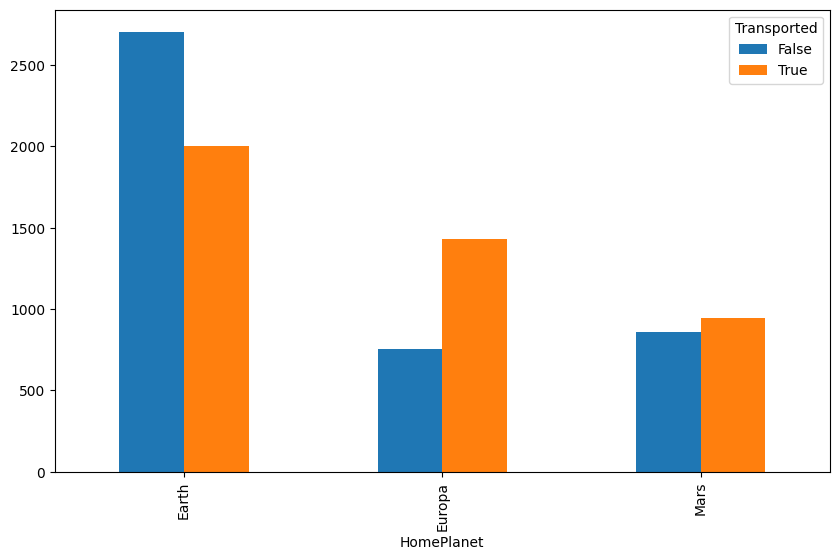

In [18]:
#Graphing what we have found so far with the replaced NaN values
#First we group by HomePlanet and Transported
group_counts = remove_nans_df.groupby(["HomePlanet", "Transported"]).size()
unstacked_counts = group_counts.unstack("Transported")
unstacked_counts.plot(kind="bar",figsize=(10, 6))

plt.legend(title="Transported")
plt.show()

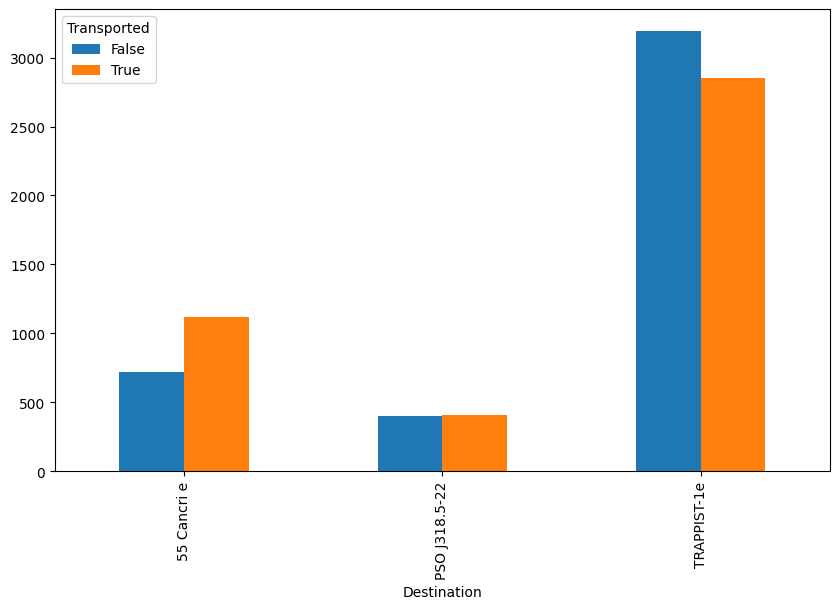

In [19]:
#Another graph for Destination and Transported
group_counts = remove_nans_df.groupby(["Destination", "Transported"]).size()
unstacked_counts = group_counts.unstack("Transported")
unstacked_counts.plot(kind="bar",figsize=(10, 6))

plt.legend(title="Transported")
plt.show()

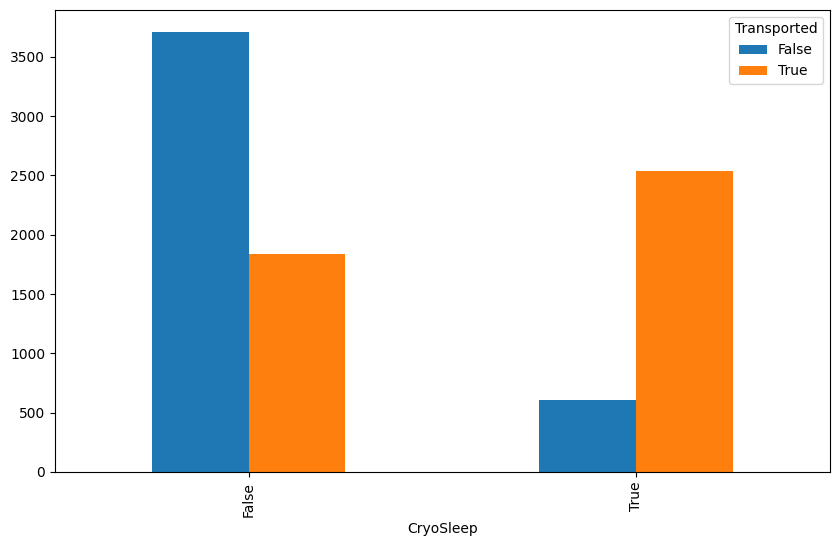

In [21]:
#Another graph for CryoSleep and Transported
group_counts = remove_nans_df.groupby(["CryoSleep", "Transported"]).size()
unstacked_counts = group_counts.unstack("Transported")
unstacked_counts.plot(kind="bar",figsize=(10, 6))

plt.legend(title="Transported")
plt.show()

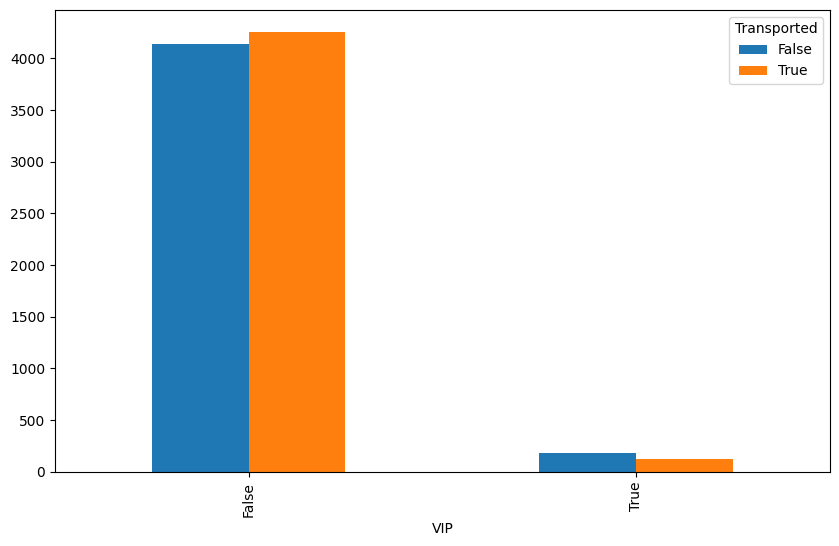

In [24]:
#Another graph for VIP and Transported
group_counts = remove_nans_df.groupby(["VIP", "Transported"]).size()
unstacked_counts = group_counts.unstack("Transported")
unstacked_counts.plot(kind="bar",figsize=(10, 6))

plt.legend(title="Transported")
plt.show()

In [ ]:
#From above graphs, we can see Cyrosleep and HomePlanet have a significant impact on whether a person is transported or not
#Destination has a smaller impact, it might even be negligible with potentially another variable affecting the outcome
#VIP has no impact on whether a person is transported. Both true and false have the same ratio of transported to not transported



In [41]:
#logistic regression ~use at end~
df_cryo = remove_nans_df.copy()
clf = LogisticRegression(random_state=0)
y = df["Transported"]
df_cryo = df_cryo.drop(columns=["HomePlanet", "Destination", "Age", "VIP", 
                           "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" , "Transported"])
fitted_model = clf.fit(df_cryo, y)
x_test = df2.drop(columns=["HomePlanet", "Destination", "Age", "VIP", 
                           "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])
predictions = fitted_model.predict(x_test)
print(classification_report(x_test, predictions))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values